In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

In [67]:
import pandas as pd

# Chemin vers votre fichier d'entraînement CSV
train_file_path = '/content/train_data.csv'  # Remplacez par le chemin réel

try:
    train_data = pd.read_csv(train_file_path)
    print("Jeu de données d'entraînement chargé avec succès :")
    print(train_data.head())
except FileNotFoundError:
    print(f"Erreur : Le fichier d'entraînement à l'emplacement '{train_file_path}' n'a pas été trouvé.")
    train_data = None
except Exception as e:
    print(f"Une erreur s'est produite lors du chargement du fichier d'entraînement : {e}")
    train_data = None

Jeu de données d'entraînement chargé avec succès :
   ID_Membre  Age   Sexe  Moyenne_Lycée Filiére  Autres_Clubs  \
0        337   20  Homme          13.35     IIA             3   
1       2241   25  Femme          15.55     ART             4   
2       1323   20  Femme          18.20      RT             2   
3       3011   20  Femme          13.90     IIA             1   
4       4591   22  Homme          11.75      RT             1   

   Projets_Realisés  Evaluation_Bureau  Soft_Skills  Score_Entretien  \
0                 1             2.9250            9                7   
1                 5             4.2000            4               10   
2                 9             3.4625           10                7   
3                 8             2.9750            5                9   
4                 8             4.3500            2                6   

  Experience_Professionnelle  Indice_Engagement            Cellule  \
0                         No           2.622557        

In [68]:
if train_data is not None:
    print("\n--- Informations sur le jeu de données d'entraînement ---")
    train_data.info()


--- Informations sur le jeu de données d'entraînement ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4950 entries, 0 to 4949
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID_Membre                   4950 non-null   int64  
 1   Age                         4950 non-null   int64  
 2   Sexe                        4950 non-null   object 
 3   Moyenne_Lycée               4950 non-null   float64
 4   Filiére                     4950 non-null   object 
 5   Autres_Clubs                4950 non-null   int64  
 6   Projets_Realisés            4950 non-null   int64  
 7   Evaluation_Bureau           4950 non-null   float64
 8   Soft_Skills                 4950 non-null   int64  
 9   Score_Entretien             4950 non-null   int64  
 10  Experience_Professionnelle  4950 non-null   object 
 11  Indice_Engagement           4950 non-null   float64
 12  Cellule                     495

In [69]:
if train_data is not None:
    print("\n--- Nombre de valeurs manquantes par colonne dans le jeu de données d'entraînement ---")
    print(train_data.isnull().sum())

    # Pourcentage de valeurs manquantes par colonne
    print("\n--- Pourcentage de valeurs manquantes par colonne ---")
    print(train_data.isnull().mean() * 100)


--- Nombre de valeurs manquantes par colonne dans le jeu de données d'entraînement ---
ID_Membre                     0
Age                           0
Sexe                          0
Moyenne_Lycée                 0
Filiére                       0
Autres_Clubs                  0
Projets_Realisés              0
Evaluation_Bureau             0
Soft_Skills                   0
Score_Entretien               0
Experience_Professionnelle    0
Indice_Engagement             0
Cellule                       0
Formations                    0
dtype: int64

--- Pourcentage de valeurs manquantes par colonne ---
ID_Membre                     0.0
Age                           0.0
Sexe                          0.0
Moyenne_Lycée                 0.0
Filiére                       0.0
Autres_Clubs                  0.0
Projets_Realisés              0.0
Evaluation_Bureau             0.0
Soft_Skills                   0.0
Score_Entretien               0.0
Experience_Professionnelle    0.0
Indice_Engagement     

In [70]:
if train_data is not None:
    print("\n--- Statistiques descriptives des variables numériques dans le jeu de données d'entraînement ---")
    print(train_data.describe())


--- Statistiques descriptives des variables numériques dans le jeu de données d'entraînement ---
         ID_Membre          Age  Moyenne_Lycée  Autres_Clubs  \
count  4950.000000  4950.000000    4950.000000   4950.000000   
mean   2766.110707    22.613737      14.964323      1.981010   
std    1584.241468     2.516202       2.872584      1.407641   
min       1.000000    18.000000      10.000000      0.000000   
25%    1401.250000    20.000000      12.500000      1.000000   
50%    2777.500000    23.000000      14.950000      2.000000   
75%    4133.750000    25.000000      17.450000      3.000000   
max    5500.000000    25.000000      20.000000      4.000000   

       Projets_Realisés  Evaluation_Bureau  Soft_Skills  Score_Entretien  \
count       4950.000000        4950.000000  4950.000000      4950.000000   
mean           4.557172           3.774629     5.547273         6.709697   
std            2.879731           0.720087     2.854399         1.784389   
min            0.0000

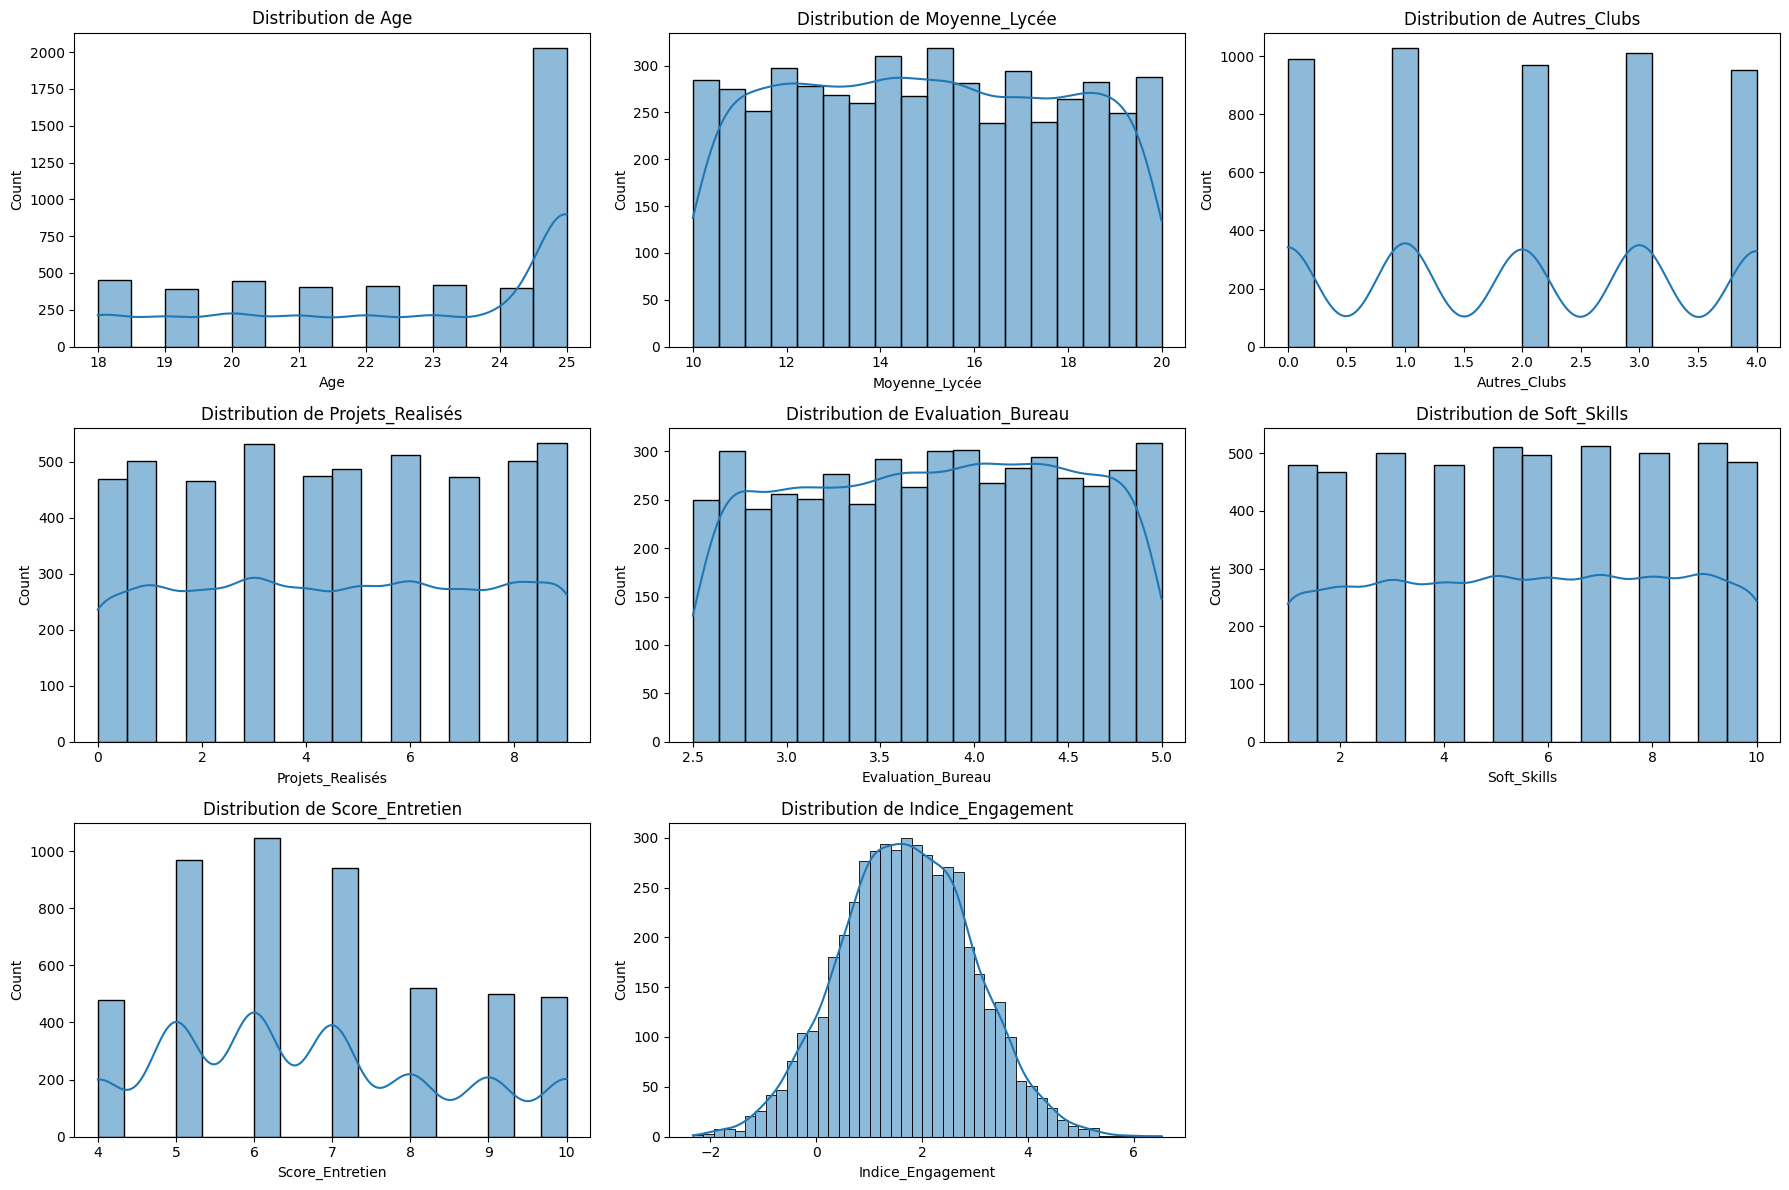

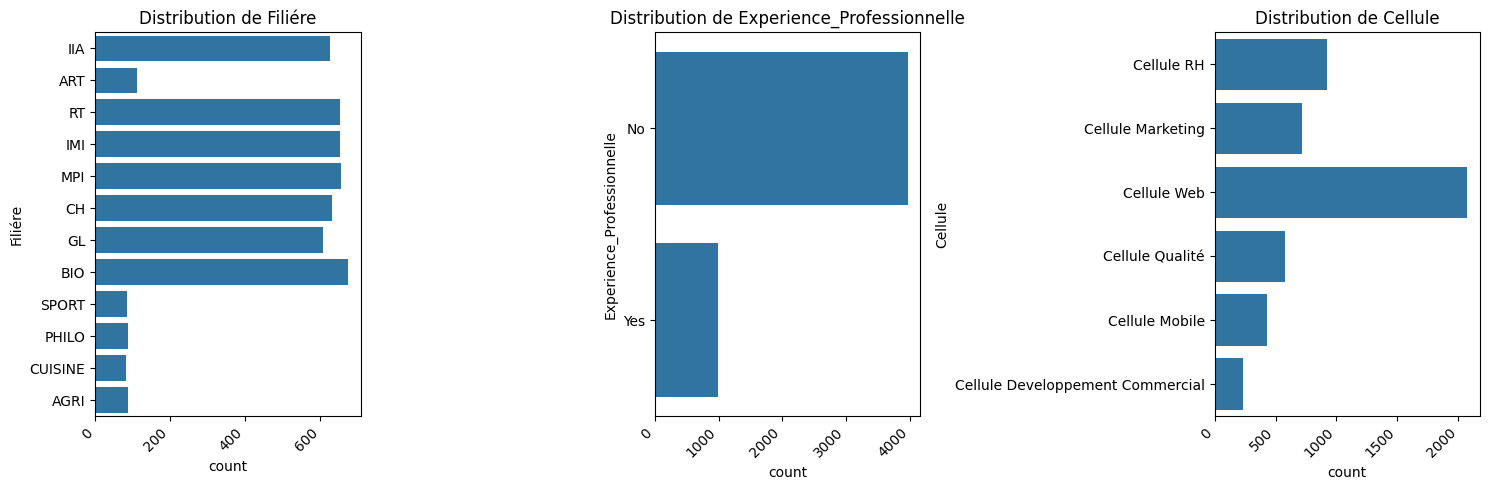

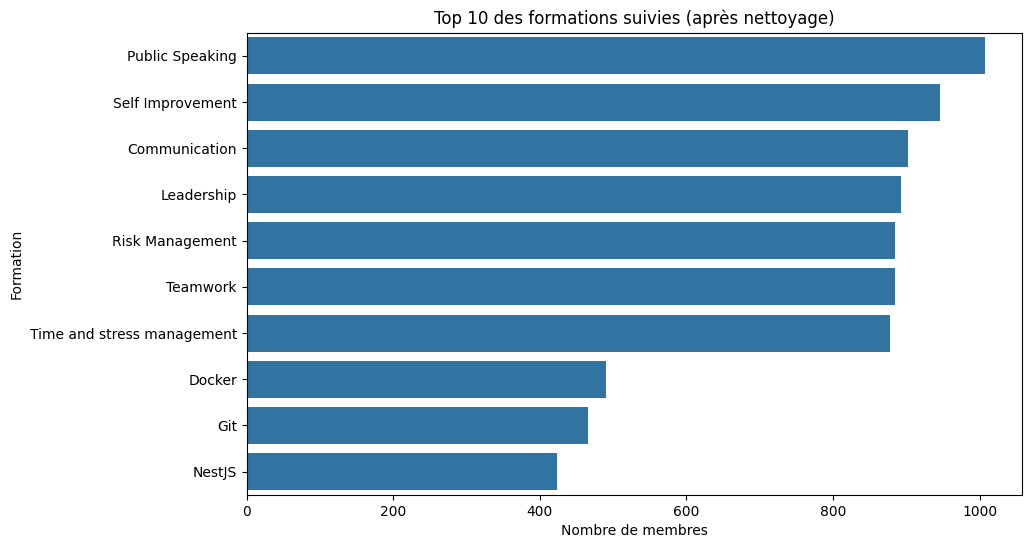

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

if train_data is not None:
    # --- Distributions des variables numériques ---
    numerical_cols = ['Age', 'Moyenne_Lycée', 'Autres_Clubs', 'Projets_Realisés', 'Evaluation_Bureau', 'Soft_Skills', 'Score_Entretien', 'Indice_Engagement']
    plt.figure(figsize=(18, 12))
    for i, col in enumerate(numerical_cols):
        plt.subplot(3, 3, i + 1)
        sns.histplot(train_data[col], kde=True)
        plt.title(f'Distribution de {col}')
    plt.tight_layout()
    plt.show()

    # --- Distributions des variables catégorielles ---
    categorical_cols = ['Filiére', 'Experience_Professionnelle', 'Cellule']
    plt.figure(figsize=(15, 5))
    for i, col in enumerate(categorical_cols):
        plt.subplot(1, 3, i + 1)
        sns.countplot(train_data[col])
        plt.title(f'Distribution de {col}')
        plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # --- Analyse de la colonne 'Formations' (si pertinent pour la visualisation de distribution) ---
    # Cela dépend de la structure et de ce que vous voulez visualiser (e.g., les formations les plus fréquentes).
    # Si vous avez une liste de formations par membre, vous pouvez la décomposer et compter les occurrences.
    formations_list = train_data['Formations'].dropna().str.split(', ', expand=True).stack()
    if not formations_list.empty:
        formation_counts = formations_list.value_counts().nlargest(10)
        plt.figure(figsize=(10, 6))
        sns.barplot(x=formation_counts.values, y=formation_counts.index)
        plt.title('Top 10 des formations suivies (après nettoyage)')
        plt.xlabel('Nombre de membres')
        plt.ylabel('Formation')
        plt.show()

In [72]:
if train_data is not None and 'Filiére' in train_data.columns:
    filieres_a_conserver = ['CH', 'BIO', 'RT', 'IIA', 'GL', 'IMI']
    train_data_filtered = train_data[train_data['Filiére'].isin(filieres_a_conserver)].copy()
    print(f"Nombre de lignes après filtrage des filières : {len(train_data_filtered)}")
else:
    print("Le jeu de données nettoyé n'est pas disponible ou la colonne 'Filiére' n'existe pas.")
    train_data_filtered = None

Nombre de lignes après filtrage des filières : 3841


In [73]:
if train_data_filtered is not None and 'Sexe' in train_data_filtered.columns:
    train_data_filtered = train_data_filtered.drop(columns=['Sexe'])
    print("Colonne 'sexe' supprimée.")
elif train_data_filtered is not None:
    print("La colonne 'sexe' n'a pas été trouvée dans le jeu de données.")

Colonne 'sexe' supprimée.


In [74]:
if train_data_filtered is not None and 'Age' in train_data_filtered.columns:
    train_data_filtered_age = train_data_filtered[train_data_filtered['Age'] <= 24].copy()
    print(f"Nombre de lignes après filtrage par âge (<= 24 ans) : {len(train_data_filtered_age)}")
else:
    print("Le jeu de données réduit n'est pas disponible ou la colonne 'Age' n'existe pas.")
    train_data_filtered_age = None

Nombre de lignes après filtrage par âge (<= 24 ans) : 2250


In [75]:
if train_data_filtered_age is not None and 'Indice_Engagement' in train_data_filtered_age.columns:
    train_data_filtered_engagement = train_data_filtered_age[train_data_filtered_age['Indice_Engagement'] > 0].copy()
    print(f"Nombre de lignes après filtrage par indice d'engagement (> 0) : {len(train_data_filtered_engagement)}")
else:
    print("Le jeu de données filtré par âge n'est pas disponible ou la colonne 'Indice_Engagement' n'existe pas.")
    train_data_filtered_engagement = None

Nombre de lignes après filtrage par indice d'engagement (> 0) : 2038


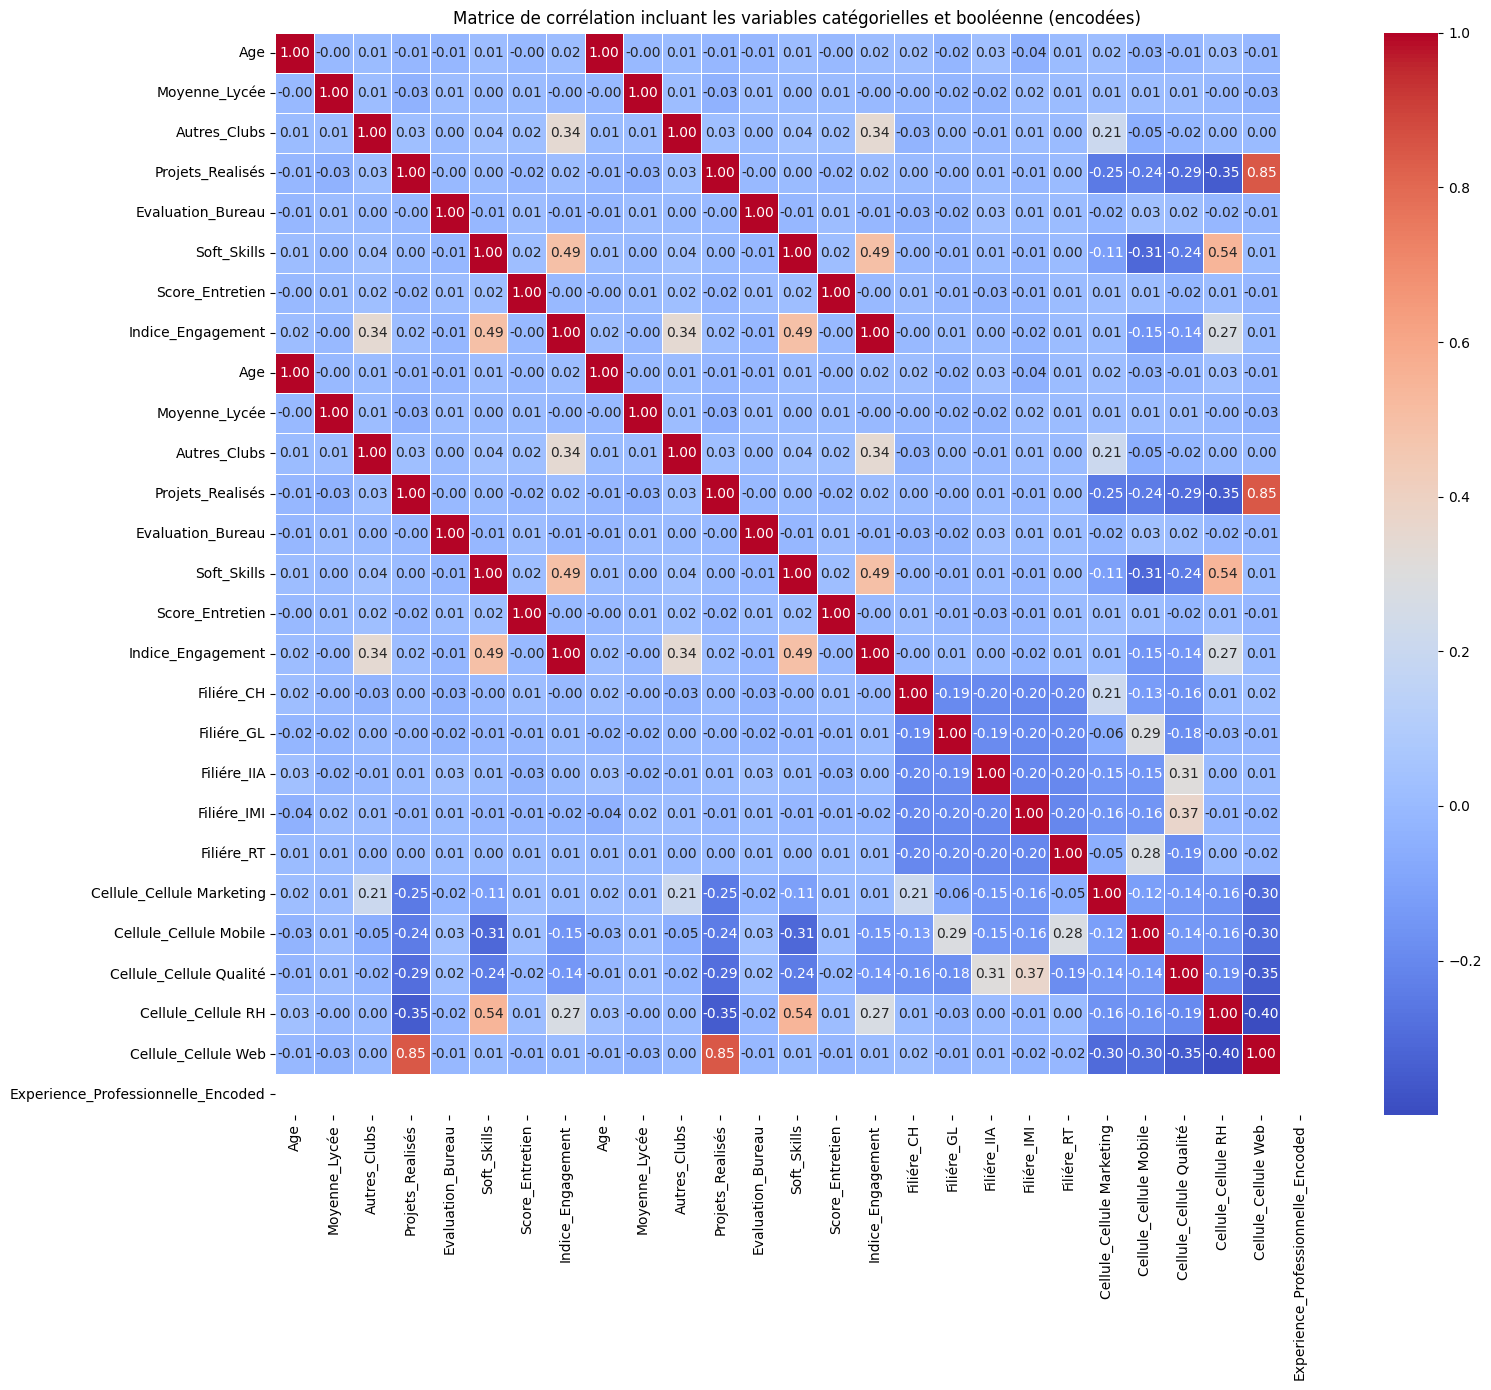

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

if train_data_filtered is not None:
    # --- Encodage one-hot des variables catégorielles ---
    train_data_encoded = pd.get_dummies(train_data_filtered, columns=['Filiére', 'Cellule'], drop_first=True)

    # --- Conversion de la variable booléenne en numérique ---
    if 'Experience_Professionnelle' in train_data_encoded.columns:
        train_data_encoded['Experience_Professionnelle_Encoded'] = train_data_encoded['Experience_Professionnelle'].map({'Oui': 1, 'Non': 0, True: 1, False: 0}).fillna(0).astype(int)
        train_data_encoded = train_data_encoded.drop(columns=['Experience_Professionnelle'])
    elif 'Experience_Professionnelle' in train_data_filtered.columns:
        train_data_encoded['Experience_Professionnelle_Encoded'] = train_data_filtered['Experience_Professionnelle'].map({'Oui': 1, 'Non': 0, True: 1, False: 0}).fillna(0).astype(int)
    else:
        print("La colonne 'Experience_Professionnelle' n'a pas été trouvée.")
        train_data_encoded = train_data_filtered.copy() # Si la colonne n'existe pas, on travaille sur le df filtré

    # --- Sélection des colonnes numériques et encodées ---
    numerical_cols = ['Age', 'Moyenne_Lycée', 'Autres_Clubs', 'Projets_Realisés', 'Evaluation_Bureau', 'Soft_Skills', 'Score_Entretien', 'Indice_Engagement']
    cols_for_correlation = numerical_cols + [col for col in train_data_encoded.columns if col not in ['ID_Membre', 'Formations']]

    # --- Calcul de la matrice de corrélation ---
    correlation_matrix_encoded = train_data_encoded[cols_for_correlation].corr()

    # --- Visualisation de la matrice de corrélation ---
    plt.figure(figsize=(16, 14))
    sns.heatmap(correlation_matrix_encoded, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Matrice de corrélation incluant les variables catégorielles et booléenne (encodées)')
    plt.tight_layout()
    plt.show()

else:
    print("Le jeu de données filtré n'est pas disponible.")

Variables hautement corrélées (avec au moins une autre variable) : []

Colonnes à supprimer (basé sur la corrélation > 0.8) : set()

Nombre de features avant réduction : 21
Nombre de features après réduction : 21

Features conservées : ['ID_Membre', 'Age', 'Moyenne_Lycée', 'Autres_Clubs', 'Projets_Realisés', 'Evaluation_Bureau', 'Soft_Skills', 'Score_Entretien', 'Indice_Engagement', 'Filiére_CH', 'Filiére_GL', 'Filiére_IIA', 'Filiére_IMI', 'Filiére_RT', 'Cellule_Cellule Marketing', 'Cellule_Cellule Mobile', 'Cellule_Cellule Qualité', 'Cellule_Cellule RH', 'Cellule_Cellule Web', 'Experience_Professionnelle_Encoded', 'ID_Membre']


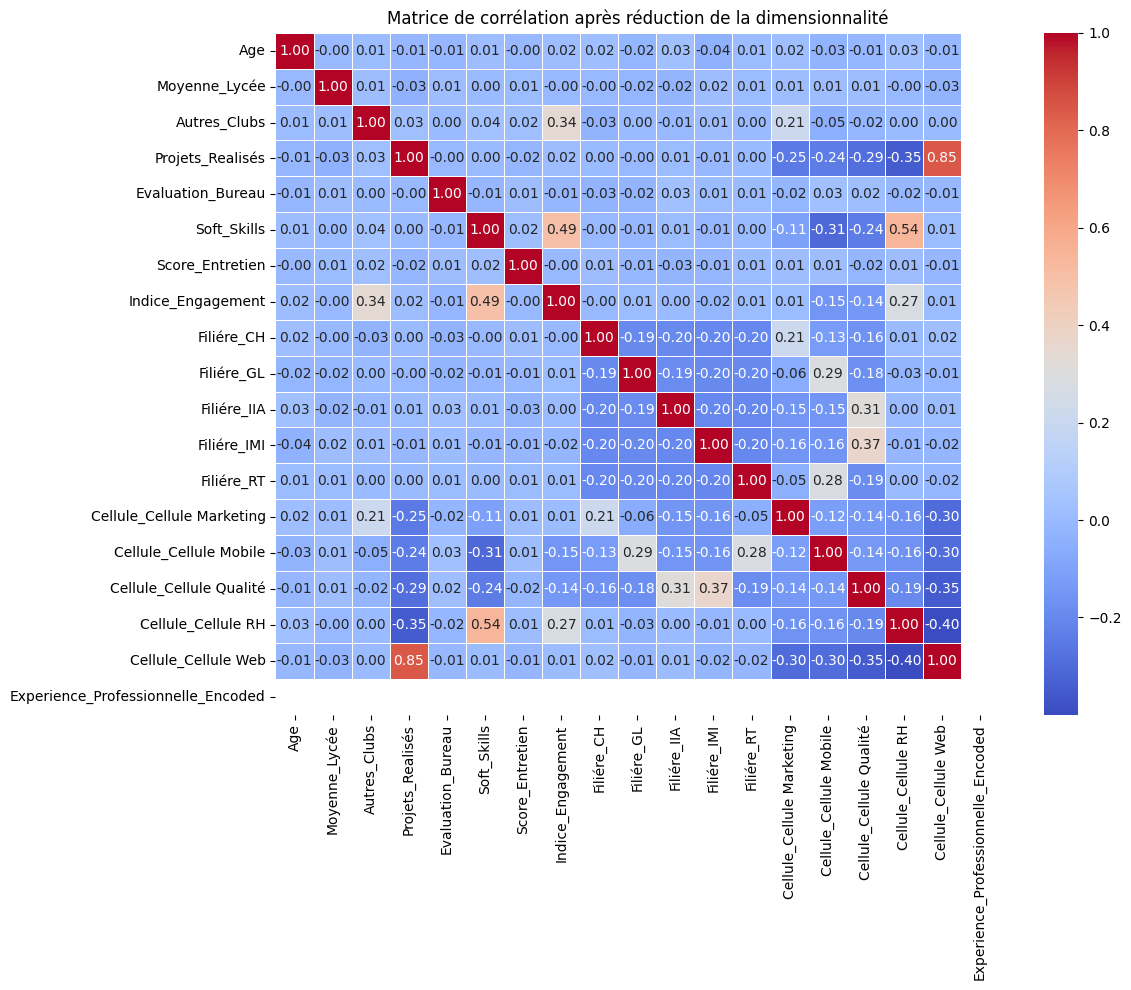

In [77]:
if train_data_encoded is not None:
    numerical_cols = ['Age', 'Moyenne_Lycée', 'Autres_Clubs', 'Projets_Realisés', 'Evaluation_Bureau', 'Soft_Skills', 'Score_Entretien', 'Indice_Engagement']
    categorical_encoded_cols = [col for col in train_data_encoded.columns if col.startswith('Filiére_') or col.startswith('Cellule_') or col == 'Experience_Professionnelle_Encoded']
    all_cols_for_corr = numerical_cols + categorical_encoded_cols

    correlation_matrix = train_data_encoded[all_cols_for_corr].corr().abs()
    upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
    highly_correlated_pairs = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.9)] # Seuil de corrélation à 0.8, à ajuster si nécessaire

    print("Variables hautement corrélées (avec au moins une autre variable) :", highly_correlated_pairs)

    cols_to_drop = set()
    for col in highly_correlated_pairs:
        # Trouver la colonne avec laquelle elle est le plus corrélée
        other_col = upper_triangle[col].idxmax()
        cols_to_drop.add(col) # Nous allons arbitrairement supprimer la deuxième colonne de la paire trouvée.
                               # Une logique plus sophistiquée pourrait être appliquée ici.

    # Ajouter 'ID_Membre' et 'Formations' à la liste des colonnes à conserver
    cols_to_keep = [col for col in train_data_encoded.columns if col not in cols_to_drop and col != 'Formations']
    if 'ID_Membre' in train_data_encoded.columns:
        cols_to_keep.append('ID_Membre')

    train_data_reduced = train_data_encoded[cols_to_keep].copy()

    print("\nColonnes à supprimer (basé sur la corrélation > 0.8) :", cols_to_drop)
    print("\nNombre de features avant réduction :", train_data_encoded.shape[1])
    print("Nombre de features après réduction :", train_data_reduced.shape[1])
    print("\nFeatures conservées :", train_data_reduced.columns.tolist())

    # Afficher la nouvelle matrice de corrélation
    correlation_matrix_reduced = train_data_reduced.drop(columns=['ID_Membre'], errors='ignore').corr()
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix_reduced, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Matrice de corrélation après réduction de la dimensionnalité')
    plt.tight_layout()
    plt.show()

else:
    print("Le jeu de données encodé n'est pas disponible.")


Colonnes supprimées manuellement : ['Age', 'Moyenne_Lycée', 'Filiére_CH', 'Filiére_GL', 'Filiére_IIA', 'Filiére_IMI', 'Filiére_RT', 'Indice_Engagement', 'Evaluation_Bureau', 'Autres_Clubs', 'Score_Entretien']

Nombre de features avant suppression manuelle : 21
Nombre de features après suppression manuelle : 10

Features conservées : ['ID_Membre', 'Projets_Realisés', 'Soft_Skills', 'Formations', 'Cellule_Cellule Marketing', 'Cellule_Cellule Mobile', 'Cellule_Cellule Qualité', 'Cellule_Cellule RH', 'Cellule_Cellule Web', 'Experience_Professionnelle_Encoded']


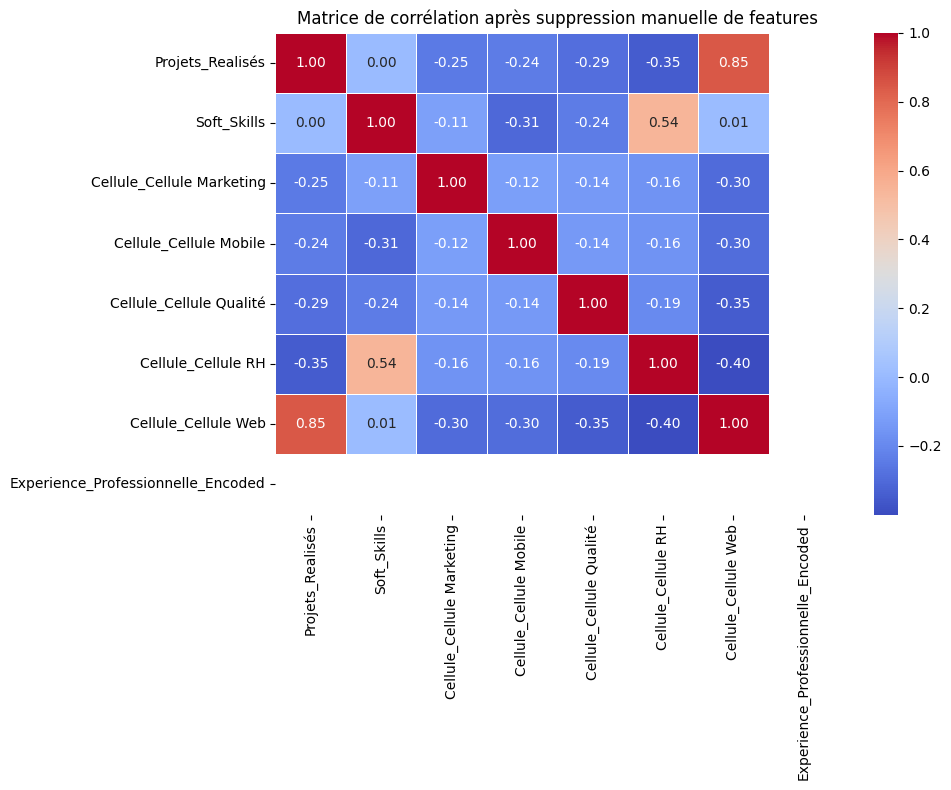

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

if train_data_encoded is not None:
    cols_to_drop_manually = ['Age', 'Moyenne_Lycée', 'Filiére_CH', 'Filiére_GL', 'Filiére_IIA', 'Filiére_IMI', 'Filiére_RT', 'Indice_Engagement', 'Evaluation_Bureau', 'Autres_Clubs', 'Score_Entretien']
    train_data_reduced_manual = train_data_encoded.drop(columns=[col for col in cols_to_drop_manually if col in train_data_encoded.columns], errors='ignore').copy()

    print("\nColonnes supprimées manuellement :", [col for col in cols_to_drop_manually if col in train_data_encoded.columns])
    print("\nNombre de features avant suppression manuelle :", train_data_encoded.shape[1])
    print("Nombre de features après suppression manuelle :", train_data_reduced_manual.shape[1])
    print("\nFeatures conservées :", train_data_reduced_manual.columns.tolist())

    # Afficher la nouvelle matrice de corrélation
    # Drop 'Formations' column before calculating correlation
    correlation_matrix_reduced_manual = train_data_reduced_manual.drop(columns=['ID_Membre', 'Formations'], errors='ignore').corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix_reduced_manual, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Matrice de corrélation après suppression manuelle de features')
    plt.tight_layout()
    plt.show()

else:
    print("Le jeu de données encodé n'est pas disponible.")

In [85]:
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

if 'ID_Membre' in train_data_reduced_manual.columns and 'Formations' in train_data_reduced_manual.columns:
    # Préparation des features pour le modèle KNN
    features_knn = train_data_reduced_manual.drop(columns=['ID_Membre', 'Formations'], errors='ignore')

    # Standardisation des features numériques
    scaler = StandardScaler()
    features_scaled_knn = scaler.fit_transform(features_knn)
    features_scaled_df_knn = pd.DataFrame(features_scaled_knn, index=train_data_reduced_manual['ID_Membre'])

    # Entraînement du modèle KNN
    knn_model = NearestNeighbors(n_neighbors=5, metric='cosine')
    knn_model.fit(features_scaled_knn)

    def get_recommendations_knn(member_id, features_scaled_df, train_data, knn_model, k_neighbors=5, top_n=3):
        if member_id not in features_scaled_df.index:
            print(f"ID de membre '{member_id}' non trouvé dans les données d'entraînement.")
            return []

        member_vector = features_scaled_df.loc[member_id].values.reshape(1, -1)
        distances, indices = knn_model.kneighbors(member_vector, n_neighbors=k_neighbors + 1)

        recommended_formations = {}
        target_member_formations = train_data[train_data['ID_Membre'] == member_id]['Formations'].iloc[0] if not train_data[train_data['ID_Membre'] == member_id].empty else []
        if isinstance(target_member_formations, str):
            target_member_formations = [f.strip() for f in target_member_formations.split(',')]
        elif not isinstance(target_member_formations, list):
            target_member_formations = []

        neighbor_ids = features_scaled_df.index[indices[0][1:]]  # Exclude the member itself
        for neighbor_id in neighbor_ids:
            neighbor_formations = train_data[train_data['ID_Membre'] == neighbor_id]['Formations'].iloc[0] if not train_data[train_data['ID_Membre'] == neighbor_id].empty else []
            if isinstance(neighbor_formations, str):
                neighbor_formations = [f.strip() for f in neighbor_formations.split(',')]
            elif not isinstance(neighbor_formations, list):
                neighbor_formations = []

            for formation in neighbor_formations:
                if formation not in target_member_formations:
                    recommended_formations[formation] = recommended_formations.get(formation, 0) + 1

        sorted_recommendations = sorted(recommended_formations.items(), key=lambda item: item[1], reverse=True)
        return [formation for formation, count in sorted_recommendations[:top_n]]

    # Exemple d'utilisation pour un membre (assurez-vous que 'train_data' est le DataFrame original)
    if 'train_data' in locals() and not train_data['ID_Membre'].empty:
        example_member_id = train_data['ID_Membre'].iloc[0]
        recommendations = get_recommendations_knn(example_member_id, features_scaled_df_knn, train_data, knn_model)
        print(f"\nRecommandations KNN pour le membre ID '{example_member_id}': {recommendations}")

else:
    print("Les colonnes 'ID_Membre' ou 'Formations' sont manquantes dans train_data_reduced_manual.")


Recommandations KNN pour le membre ID '337': ['Communication', 'Teamwork', 'Time and stress management']
